In [175]:
import numpy as np
import pandas as pd
import missingno as msn
import seaborn as sns
import matplotlib.pyplot as plt
import ydata_profiling
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [176]:
data = pd.read_csv('C:/Users/User/Downloads/ford/ford.csv')
data_copy = data.copy()
data_copy.head()
#Посмотрел, что из себя представляет датафрейм

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,Fiesta,2017,12000,Automatic,15944,Petrol,150,57.7,1.0
1,Focus,2018,14000,Manual,9083,Petrol,150,57.7,1.0
2,Focus,2017,13000,Manual,12456,Petrol,150,57.7,1.0
3,Fiesta,2019,17500,Manual,10460,Petrol,145,40.3,1.5
4,Fiesta,2019,16500,Automatic,1482,Petrol,145,48.7,1.0


In [177]:
data_copy.info()
#получил информацию о столбцах

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17966 entries, 0 to 17965
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         17966 non-null  object 
 1   year          17966 non-null  int64  
 2   price         17966 non-null  int64  
 3   transmission  17966 non-null  object 
 4   mileage       17966 non-null  int64  
 5   fuelType      17966 non-null  object 
 6   tax           17966 non-null  int64  
 7   mpg           17966 non-null  float64
 8   engineSize    17966 non-null  float64
dtypes: float64(2), int64(4), object(3)
memory usage: 1.2+ MB


In [178]:
data_copy.describe()
#просмотрел общие стандартные показатели по каждому столбцу

,year,price,mileage,tax,mpg,engineSize
count,17966.000000,17966.000000,17966.000000,17966.000000,17966.000000,17966.000000
mean,2016.866470,12279.534844,23362.608761,113.329456,57.906980,1.350807
std,2.050336,4741.343657,19472.054349,62.012456,10.125696,0.432367
min,1996.000000,495.000000,1.000000,0.000000,20.800000,0.000000
25%,2016.000000,8999.000000,9987.000000,30.000000,52.300000,1.000000
50%,2017.000000,11291.000000,18242.500000,145.000000,58.900000,1.200000
75%,2018.000000,15299.000000,31060.000000,145.000000,65.700000,1.500000
max,2060.000000,54995.000000,177644.000000,580.000000,201.800000,5.000000


In [179]:
data_copy.isnull().sum()
#В данных нет пропущенных значений, поэтому не нужно ничего заменять

model           0
year            0
price           0
transmission    0
mileage         0
fuelType        0
tax             0
mpg             0
engineSize      0
dtype: int64

In [180]:
data_copy = data_copy.drop_duplicates()
data_copy.shape

(17812, 9)

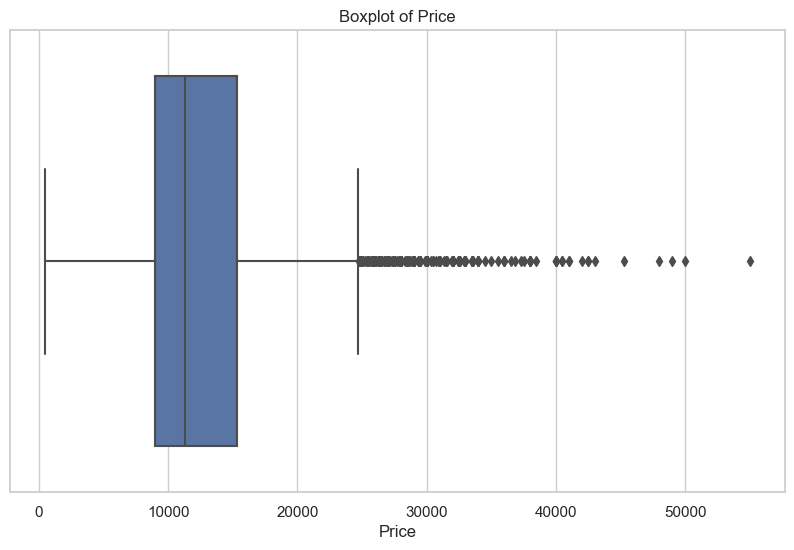

In [181]:
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.boxplot(x='price', data=data_copy)

plt.title('Boxplot of Price')
plt.xlabel('Price')

plt.show()

In [182]:
mean_price = data_copy['price'].mean()
std_price = data_copy['price'].std()

threshold = 3 * std_price

data_new = data_copy[(data_copy['price'] >= mean_price - threshold) & (data_copy['price'] <= mean_price + threshold)]
#Удалил вбросы которые являются больше 3 сигм

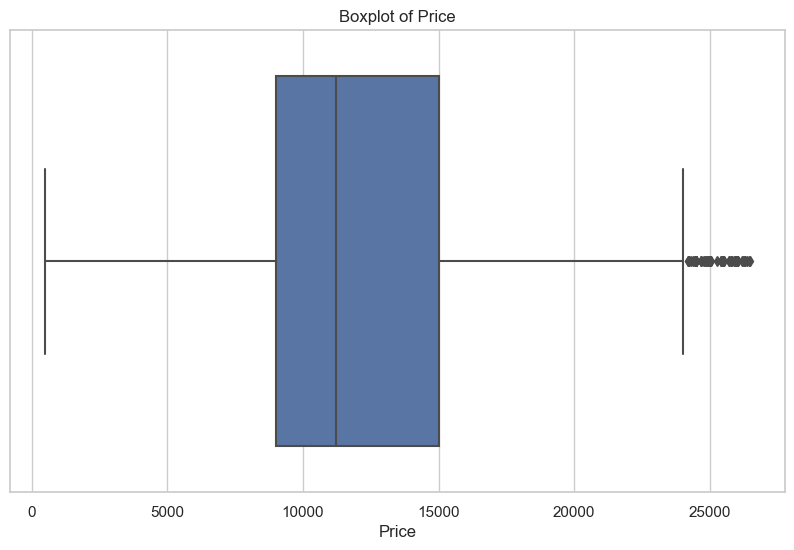

In [183]:
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.boxplot(x='price', data=data_new)

plt.title('Boxplot of Price')
plt.xlabel('Price')

plt.show()

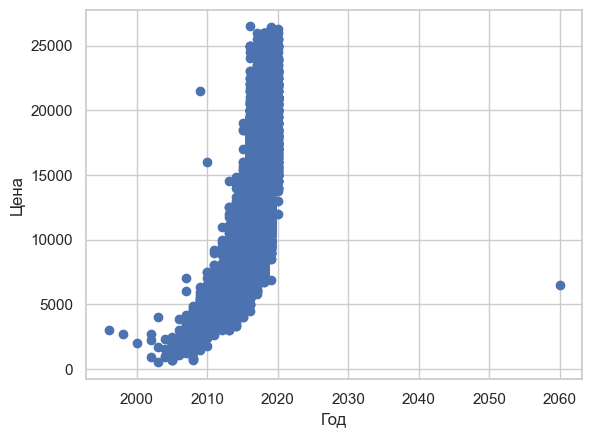

In [184]:
plt.scatter(data_new.year, data_new.price)
plt.xlabel("Год")
plt.ylabel("Цена")
plt.show()
#Взаимосвязь между ценой и годом машины. Нашел вброс по году(2060)

In [185]:
data_new = data_new.drop(data_copy[data_copy.year>2020].index)
data_new.year.value_counts()

2017    4838
2018    3956
2019    3048
2016    2311
2015    1355
2014     799
2013     606
2020     225
2012     115
2011      94
2009      91
2010      67
2008      56
2007      32
2005      16
2006      13
2004       4
2002       3
2003       3
1998       1
1996       1
2000       1
Name: year, dtype: int64

In [186]:
data_new.head()
#Нужно использовать encoder для типа object

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,Fiesta,2017,12000,Automatic,15944,Petrol,150,57.7,1.0
1,Focus,2018,14000,Manual,9083,Petrol,150,57.7,1.0
2,Focus,2017,13000,Manual,12456,Petrol,150,57.7,1.0
3,Fiesta,2019,17500,Manual,10460,Petrol,145,40.3,1.5
4,Fiesta,2019,16500,Automatic,1482,Petrol,145,48.7,1.0


In [187]:
data_enc= pd.get_dummies(data_new, columns=['model', 'transmission', 'fuelType'])
data_enc

#Применил encoding для столбцов

,year,price,mileage,tax,mpg,engineSize,model_ B-MAX,model_ C-MAX,model_ EcoSport,model_ Edge,...,model_ Transit Tourneo,model_Focus,transmission_Automatic,transmission_Manual,transmission_Semi-Auto,fuelType_Diesel,fuelType_Electric,fuelType_Hybrid,fuelType_Other,fuelType_Petrol
0,2017,12000,15944,150,57.7,1.0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
1,2018,14000,9083,150,57.7,1.0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
2,2017,13000,12456,150,57.7,1.0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
3,2019,17500,10460,145,40.3,1.5,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
4,2019,16500,1482,145,48.7,1.0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17961,2017,8999,16700,150,47.1,1.4,1,0,0,0,...,0,0,0,1,0,0,0,0,0,1
17962,2014,7499,40700,30,57.7,1.0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,1
17963,2015,9999,7010,20,67.3,1.6,0,0,0,0,...,0,0,0,1,0,1,0,0,0,0
17964,2018,8299,5007,145,57.7,1.2,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1


In [192]:
data_enc2 = data_enc
data_enc2 = data_enc2.drop('price', axis=1)

In [193]:
X = data_enc2
y = data_enc2.iloc[:, -1]

bestfeatures = SelectKBest(score_func = chi2, k = 'all')
fit = bestfeatures.fit(X, y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)

featureScores = pd.concat([dfcolumns, dfscores], axis = 1)
featureScores.columns = ['Specs', 'Score']
print(featureScores.nlargest(10, 'Score'))
#просмотрел важность признаков, но не буду ничего исключать

              Specs         Score
1           mileage  1.970989e+07
32  fuelType_Diesel  1.195345e+04
2               tax  1.039494e+04
36  fuelType_Petrol  5.639000e+03
3               mpg  2.797659e+03
18      model_ Kuga  2.240836e+03
10    model_ Fiesta  2.017639e+03
4        engineSize  1.068336e+03
19    model_ Mondeo  6.422575e+02
23     model_ S-MAX  4.071287e+02


In [194]:
scaler = StandardScaler()

columns_to_standardize = ['mileage', 'tax', 'mpg', 'engineSize']

data_enc2[columns_to_standardize] = scaler.fit_transform(data_enc2[columns_to_standardize])
#Стандартизировал некоторые столбцы

In [195]:
data_enc2

,year,mileage,tax,mpg,engineSize,model_ B-MAX,model_ C-MAX,model_ EcoSport,model_ Edge,model_ Escort,...,model_ Transit Tourneo,model_Focus,transmission_Automatic,transmission_Manual,transmission_Semi-Auto,fuelType_Diesel,fuelType_Electric,fuelType_Hybrid,fuelType_Other,fuelType_Petrol
0,2017,-0.391625,0.602699,-0.039916,-0.860879,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
1,2018,-0.744792,0.602699,-0.039916,-0.860879,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
2,2017,-0.571168,0.602699,-0.039916,-0.860879,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
3,2019,-0.673911,0.521615,-1.854445,0.418822,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
4,2019,-1.136050,0.521615,-0.978466,-0.860879,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17961,2017,-0.352710,0.602699,-1.145319,0.162882,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
17962,2014,0.882678,-1.343313,-0.039916,-0.860879,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
17963,2015,-0.851499,-1.505481,0.961204,0.674762,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,0
17964,2018,-0.954602,0.521615,-0.039916,-0.348999,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1


In [196]:
pca = PCA(n_components = 1)

principalComponents = pca.fit_transform(data_enc2)
principalDf = pd.DataFrame(data = principalComponents, columns = ['n'])

principalDf.head()
#уменьшил размерность

,n
0,-0.519958
1,-1.547940
2,-0.578376
3,-2.331102
4,-2.622297


In [197]:
principalDf

,n
0,-0.519958
1,-1.547940
2,-0.578376
3,-2.331102
4,-2.622297
...,...
17630,-0.410861
17631,3.008299
17632,1.774252
17633,-1.541508


In [199]:
print("Number of records in 'n':", len(principalDf['n']))
print("Number of records in 'price':", len(data_enc['price']))


Number of records in 'n': 17635
Number of records in 'price': 17635


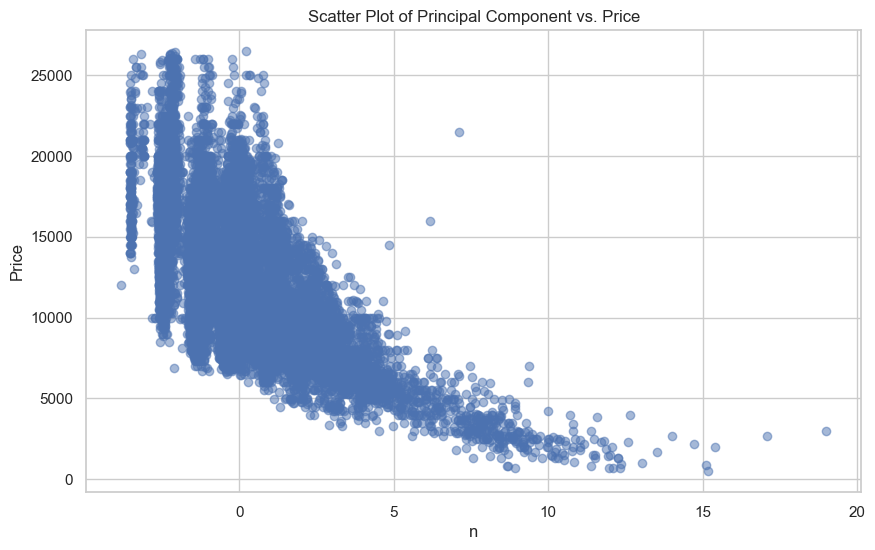

In [206]:
plt.figure(figsize=(10, 6))

plt.scatter(principalDf['n'], data_enc['price'], alpha=0.5)
plt.title('Scatter Plot of Principal Component vs. Price')
plt.xlabel('n')
plt.ylabel('Price')
plt.grid(True)

plt.show()